In [8]:
import pickle
import shap
with open('cancer_type_shap_values_rep9_all_obj.pkl', 'rb') as f:
    data = pickle.load(f)   # 读出来的就是你当初存进去的那个对象

In [9]:
data

.values =
array([[[-3.28491945e-04,  1.70806360e-03, -1.32882440e-03, ...,
         -1.01680788e-03,  7.67698835e-03,  2.48432334e-03],
        [ 3.38178500e-04, -6.52653493e-05,  6.99752629e-05, ...,
          1.15391427e-04,  3.07102099e-05,  5.02675573e-05],
        [-4.36035102e-04,  2.47947271e-04, -1.62456421e-04, ...,
         -1.45627634e-04, -2.46683917e-05, -2.38188776e-05],
        ...,
        [-1.46184281e-02, -6.95923538e-03,  6.37118115e-04, ...,
         -6.27022033e-03,  1.96035200e-03, -7.54562365e-03],
        [-2.62189754e-05,  1.29175710e-05,  2.59004662e-05, ...,
          2.25547927e-05,  1.23662027e-05,  2.43100157e-05],
        [-1.76342060e-03, -5.36272380e-03,  5.01206060e-03, ...,
          3.28562338e-04, -6.59197869e-03, -2.82733625e-05]],

       [[-3.18027565e-04, -1.54251438e-03,  4.84944073e-04, ...,
          5.84424532e-05, -4.32191963e-03, -1.77676426e-03],
        [ 5.77166296e-04, -1.37748304e-04,  1.39379314e-04, ...,
          1.97711516e-04,  5

样本数: 1207, 特征数: 9101, 类别数: 15

正在处理类别 0...


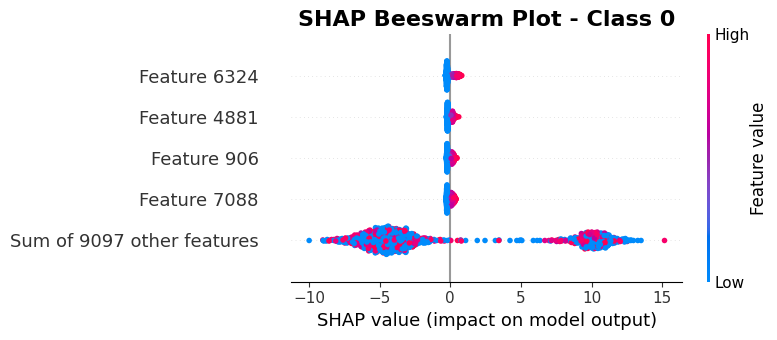


正在处理类别 1...


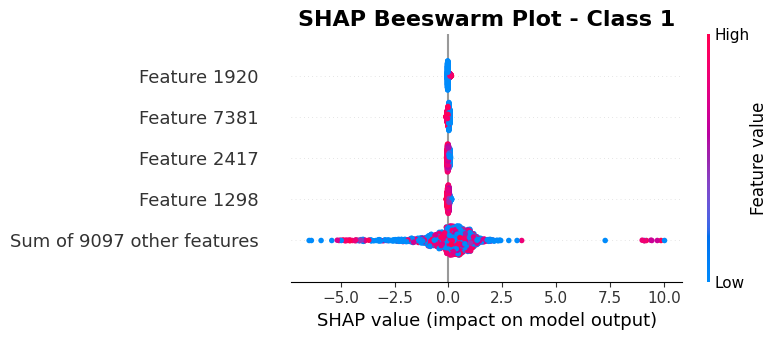


正在处理类别 2...


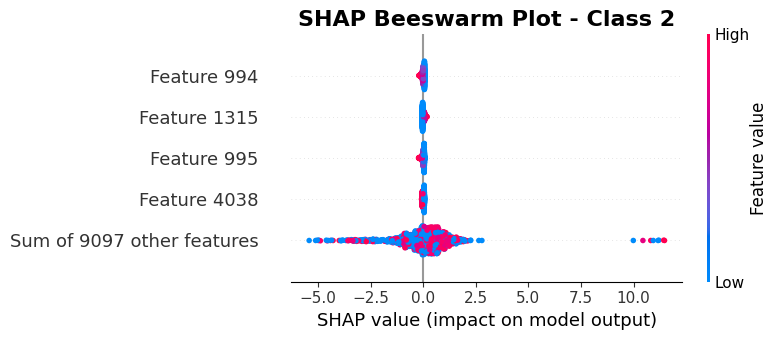


正在处理类别 3...


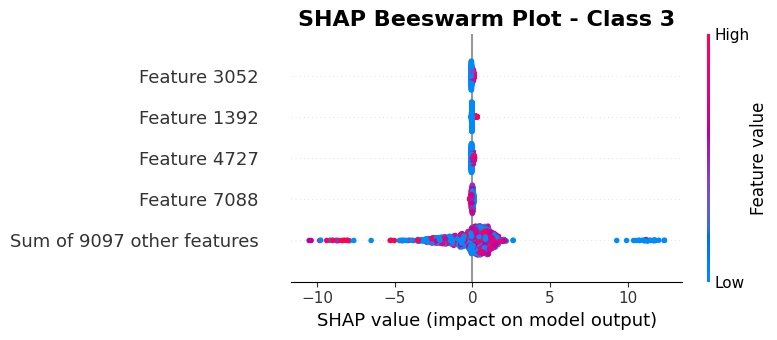


正在处理类别 4...


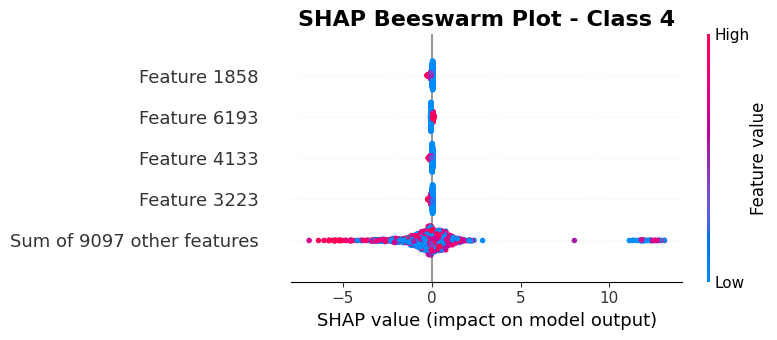


正在处理类别 5...


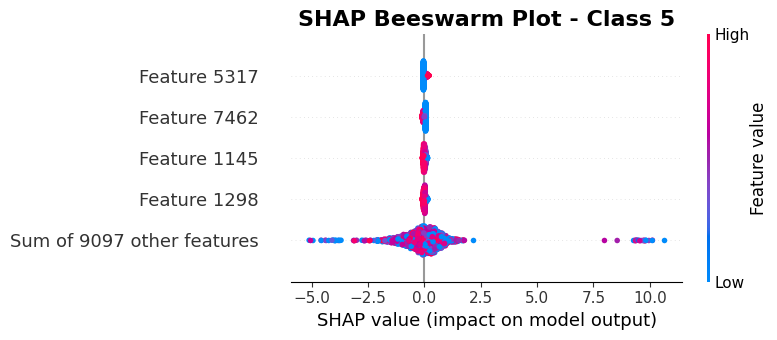


正在处理类别 6...


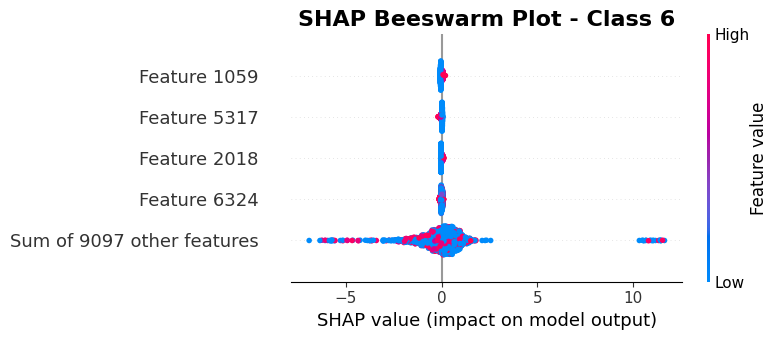


正在处理类别 7...


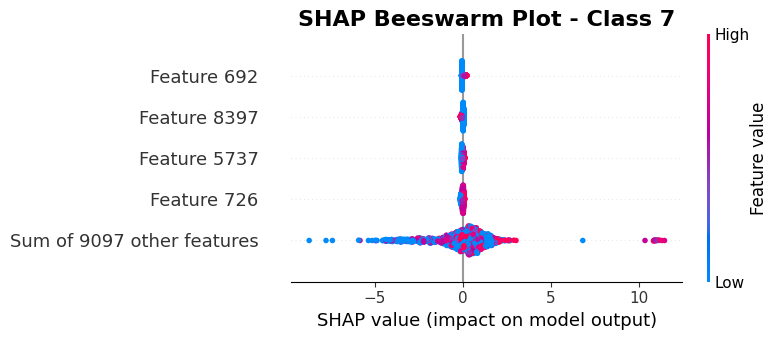


正在处理类别 8...


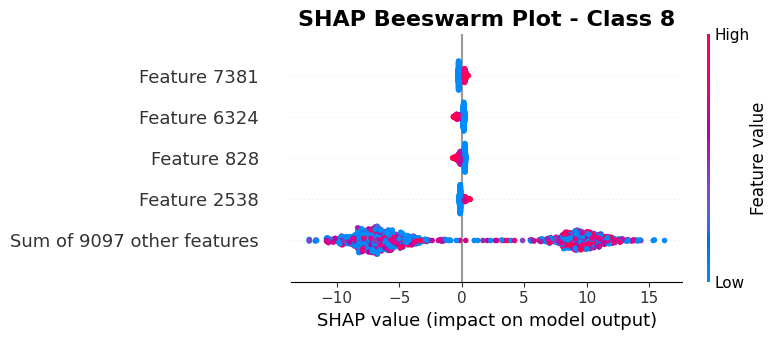


正在处理类别 9...


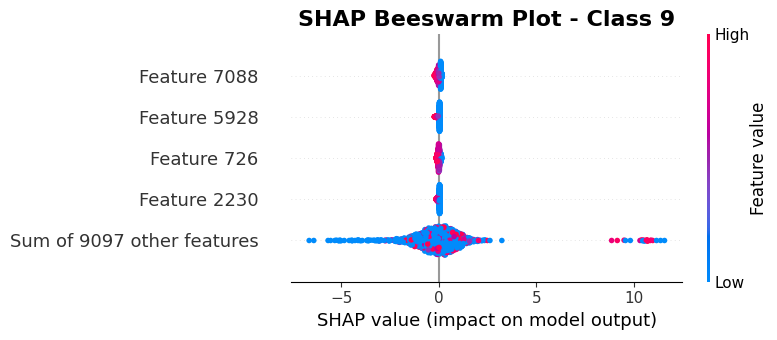


正在处理类别 10...


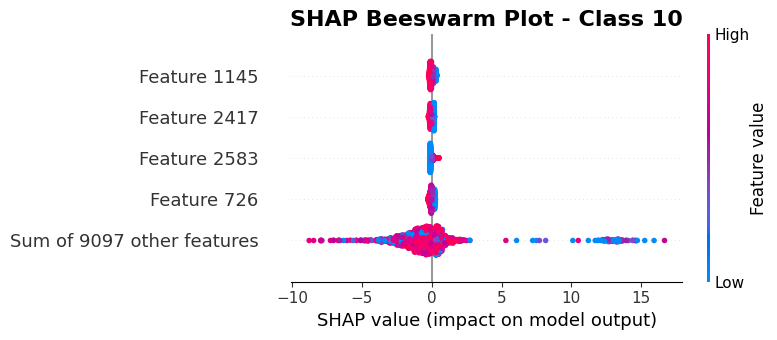


正在处理类别 11...


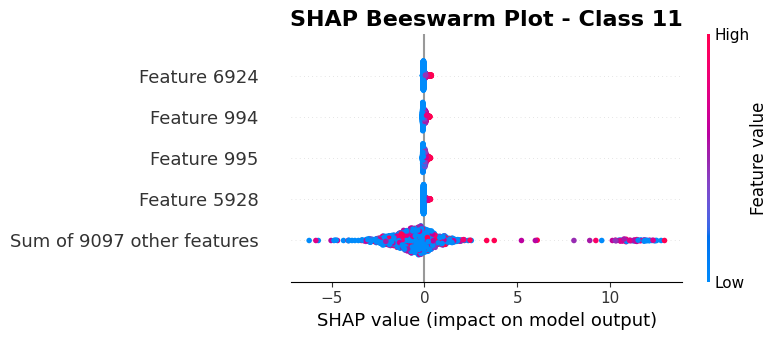


正在处理类别 12...


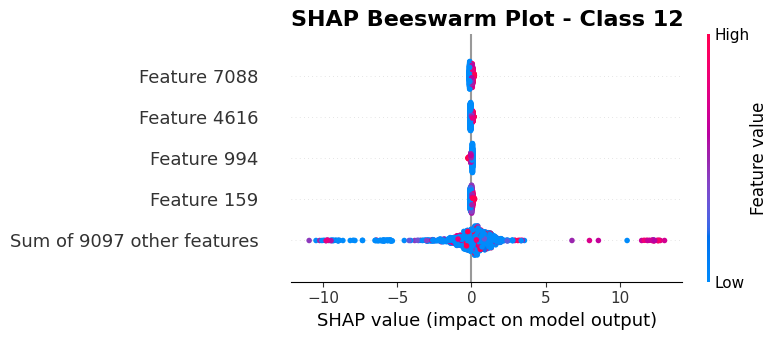


正在处理类别 13...


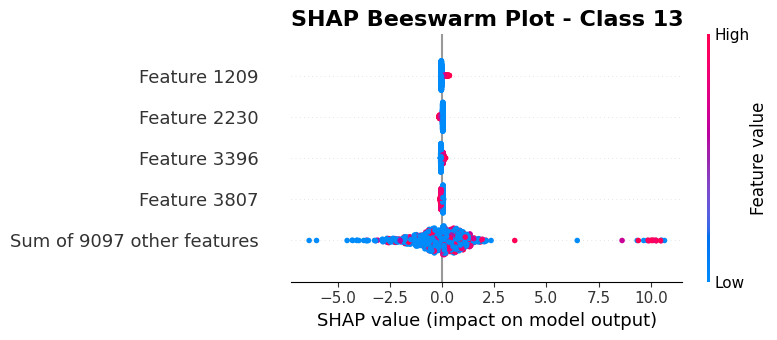


正在处理类别 14...


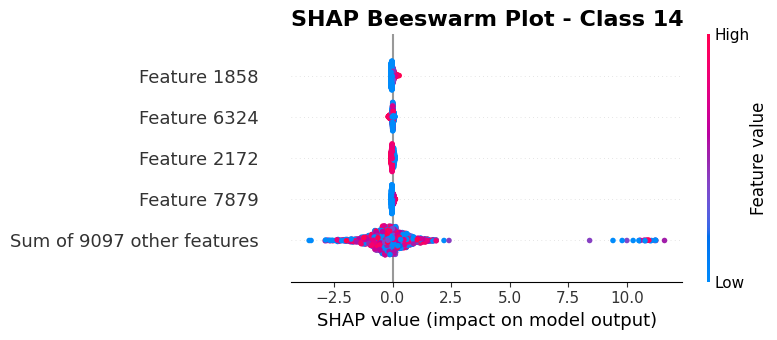

In [12]:
import pickle
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
with open('cancer_type_shap_values_rep9_all_obj.pkl', 'rb') as f:
    data = pickle.load(f)

# 数据预处理
# 将数据从GPU转移到CPU并转换为numpy数组
if hasattr(data.data, 'cpu'):
    feature_data = data.data.cpu().numpy()
else:
    feature_data = data.data

shap_values = data.values

# 获取数据形状信息
n_samples, n_features, n_classes = shap_values.shape
print(f"样本数: {n_samples}, 特征数: {n_features}, 类别数: {n_classes}")

# 假设你有特征名称，如果没有可以用数字代替
# feature_names = [f'Feature_{i}' for i in range(n_features)]
# 或者如果你有真实的特征名，请替换这里
# feature_names = ['gene1', 'gene2', ...] 

# 为每个类别创建单独的Beeswarm Plot
for class_idx in range(n_classes):
    print(f"\n正在处理类别 {class_idx}...")
    
    # 提取当前类别的SHAP值
    class_shap_values = shap_values[:, :, class_idx]
    
    # 创建当前类别的Explanation对象
    class_explanation = shap.Explanation(
        values=class_shap_values,
        base_values=np.zeros(n_samples),  # 可以根据需要调整base values
        data=feature_data,
        # feature_names=feature_names  # 如果有特征名就取消注释
    )
    
    # 创建Beeswarm Plot
    plt.figure(figsize=(10, 8))
    shap.plots.beeswarm(
        class_explanation,
        max_display=5,  # 显示前20个最重要的特征
        show=False
    )
    plt.title(f'SHAP Beeswarm Plot - Class {class_idx}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    # 保存图片
    #plt.savefig(f'shap_beeswarm_class_{class_idx}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 打印当前类别的重要特征统计
    mean_abs_shap = np.abs(class_shap_values).mean(axis=0)
    top_features_idx = np.argsort(mean_abs_shap)[-10:][::-1]  # 前10个重要特征
    
    # print(f"类别 {class_idx} 的前10个重要特征:")
    # for i, idx in enumerate(top_features_idx):
    #     print(f"  {i+1}. 特征 {idx}: {mean_abs_shap[idx]:.6f}")



样本数: 1207, 特征数: 9101, 类别数: 15

正在处理类别 0...
SHAP值范围: [-0.6199, 0.8192]
设置的横轴范围: [-0.7638, 0.9632]


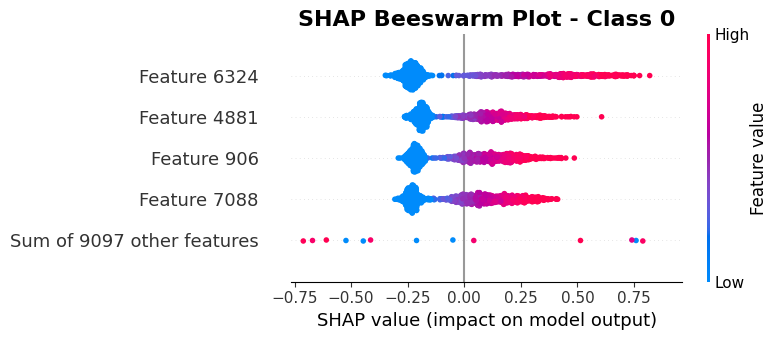

Class 0 的前10个重要特征:
  1. Feature 6324: 0.287934
  2. Feature 4881: 0.169481
  3. Feature 906: 0.166812
  4. Feature 7088: 0.166772
  5. Feature 2322: 0.161616
  6. Feature 1298: 0.152180
  7. Feature 7782: 0.146205
  8. Feature 1012: 0.138178
  9. Feature 7519: 0.136055
  10. Feature 2538: 0.134361

正在处理类别 1...
SHAP值范围: [-0.1808, 0.1860]
设置的横轴范围: [-0.2175, 0.2227]


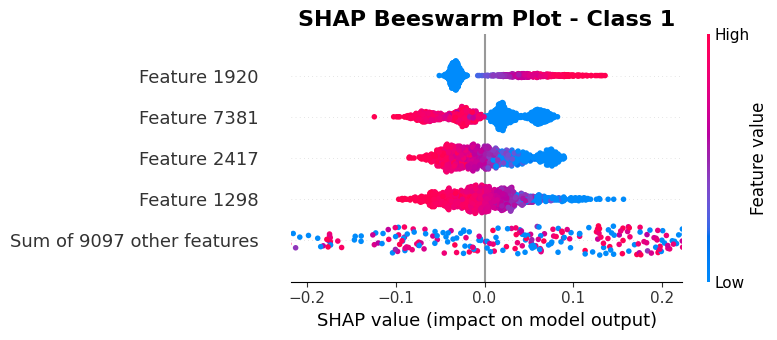

Class 1 的前10个重要特征:
  1. Feature 1920: 0.041633
  2. Feature 7381: 0.038237
  3. Feature 2417: 0.033550
  4. Feature 1298: 0.032808
  5. Feature 2423: 0.030237
  6. Feature 994: 0.030113
  7. Feature 4371: 0.028558
  8. Feature 7088: 0.028474
  9. Feature 2702: 0.028317
  10. Feature 272: 0.027671

正在处理类别 2...
SHAP值范围: [-0.2264, 0.1783]
设置的横轴范围: [-0.2668, 0.2187]


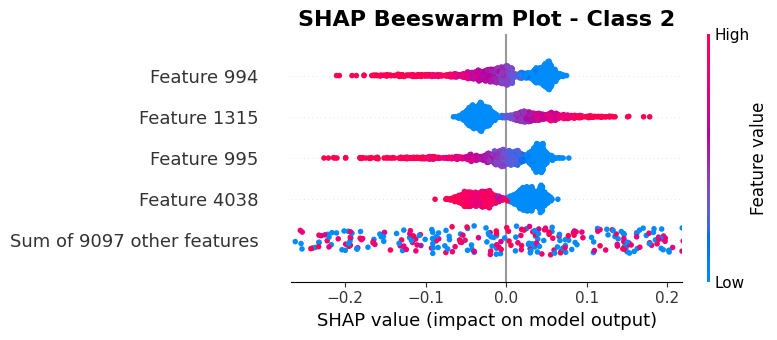

Class 2 的前10个重要特征:
  1. Feature 994: 0.039624
  2. Feature 1315: 0.038847
  3. Feature 995: 0.036086
  4. Feature 4038: 0.032684
  5. Feature 7419: 0.032639
  6. Feature 2668: 0.032524
  7. Feature 692: 0.032521
  8. Feature 6324: 0.030481
  9. Feature 5737: 0.028750
  10. Feature 435: 0.028375

正在处理类别 3...
SHAP值范围: [-0.2165, 0.3154]
设置的横轴范围: [-0.2697, 0.3686]


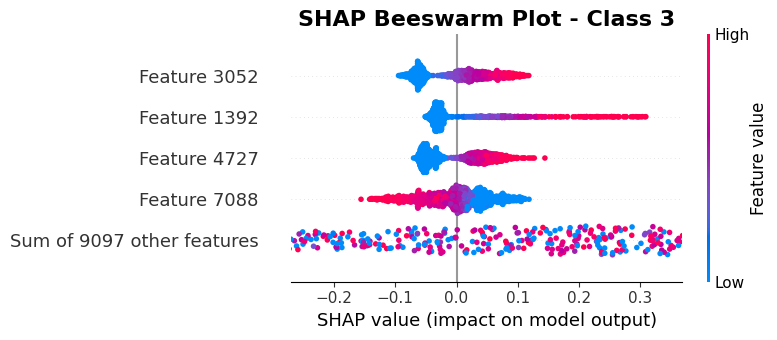

Class 3 的前10个重要特征:
  1. Feature 3052: 0.048828
  2. Feature 1392: 0.048670
  3. Feature 4727: 0.046064
  4. Feature 7088: 0.041223
  5. Feature 272: 0.039362
  6. Feature 5928: 0.038745
  7. Feature 6679: 0.036920
  8. Feature 474: 0.035025
  9. Feature 5317: 0.033973
  10. Feature 726: 0.033833

正在处理类别 4...
SHAP值范围: [-0.2689, 0.1771]
设置的横轴范围: [-0.3135, 0.2217]


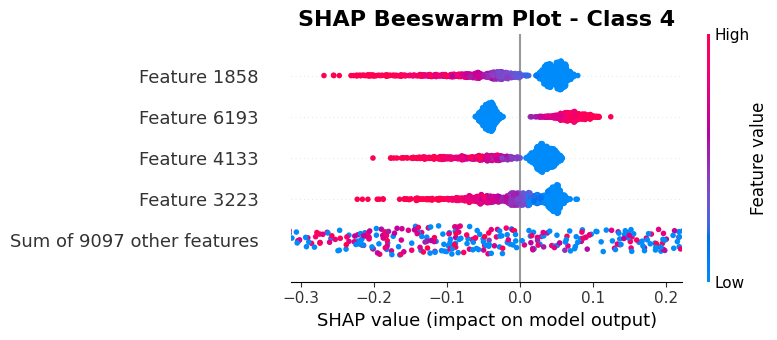

Class 4 的前10个重要特征:
  1. Feature 1858: 0.057708
  2. Feature 6193: 0.053134
  3. Feature 4133: 0.044563
  4. Feature 3223: 0.041054
  5. Feature 2762: 0.040732
  6. Feature 7381: 0.040182
  7. Feature 7337: 0.039060
  8. Feature 7088: 0.037951
  9. Feature 1126: 0.037873
  10. Feature 1768: 0.036669

正在处理类别 5...
SHAP值范围: [-0.2045, 0.2205]
设置的横轴范围: [-0.2470, 0.2630]


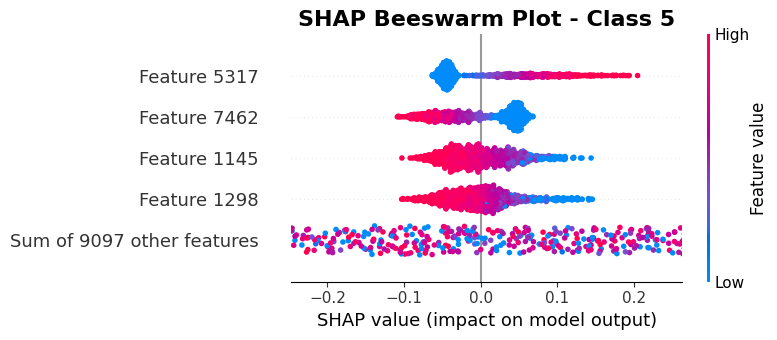

Class 5 的前10个重要特征:
  1. Feature 5317: 0.055613
  2. Feature 7462: 0.044351
  3. Feature 1145: 0.034727
  4. Feature 1298: 0.032545
  5. Feature 7782: 0.032455
  6. Feature 1494: 0.031409
  7. Feature 1858: 0.031029
  8. Feature 6324: 0.030505
  9. Feature 1315: 0.029000
  10. Feature 393: 0.028898

正在处理类别 6...
SHAP值范围: [-0.2044, 0.2003]
设置的横轴范围: [-0.2449, 0.2407]


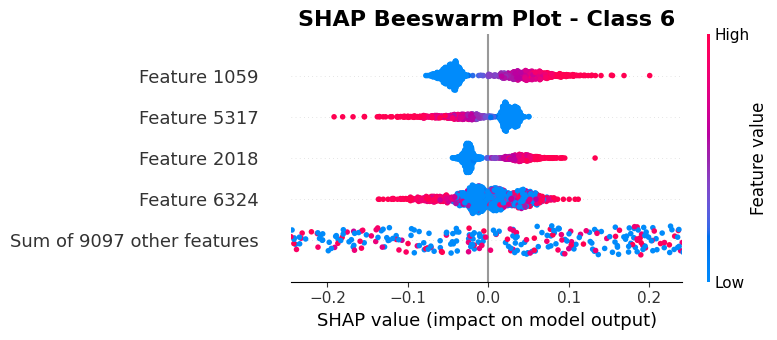

Class 6 的前10个重要特征:
  1. Feature 1059: 0.049428
  2. Feature 5317: 0.033129
  3. Feature 2018: 0.031911
  4. Feature 6324: 0.031834
  5. Feature 7337: 0.029780
  6. Feature 272: 0.028588
  7. Feature 994: 0.027709
  8. Feature 1298: 0.027325
  9. Feature 250: 0.026927
  10. Feature 7088: 0.026846

正在处理类别 7...
SHAP值范围: [-0.2729, 0.2457]
设置的横轴范围: [-0.3248, 0.2976]


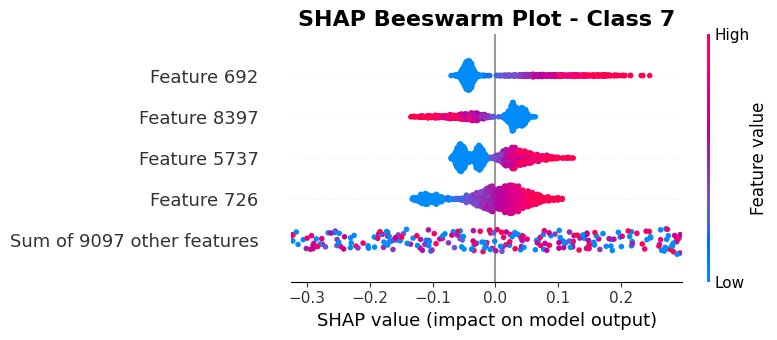

Class 7 的前10个重要特征:
  1. Feature 692: 0.059985
  2. Feature 8397: 0.041026
  3. Feature 5737: 0.040112
  4. Feature 726: 0.039726
  5. Feature 7462: 0.038817
  6. Feature 4616: 0.038261
  7. Feature 7381: 0.037590
  8. Feature 6324: 0.036241
  9. Feature 3179: 0.036185
  10. Feature 5872: 0.036062

正在处理类别 8...
SHAP值范围: [-0.7199, 0.6726]
设置的横轴范围: [-0.8592, 0.8119]


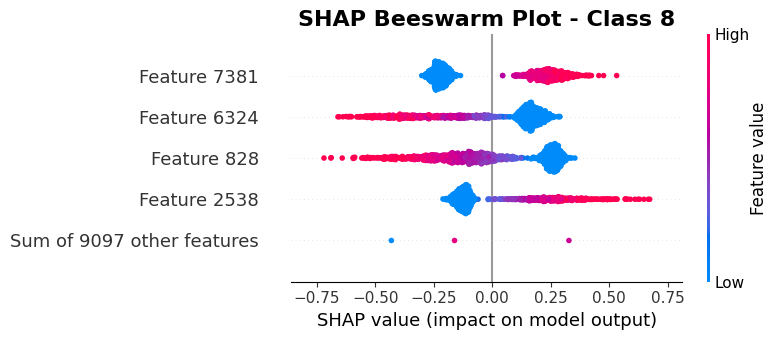

Class 8 的前10个重要特征:
  1. Feature 7381: 0.233027
  2. Feature 6324: 0.210053
  3. Feature 828: 0.206095
  4. Feature 2538: 0.171837
  5. Feature 975: 0.161966
  6. Feature 3535: 0.137246
  7. Feature 1570: 0.132496
  8. Feature 5812: 0.131916
  9. Feature 1673: 0.131912
  10. Feature 4352: 0.127095

正在处理类别 9...
SHAP值范围: [-0.2528, 0.1727]
设置的横轴范围: [-0.2954, 0.2153]


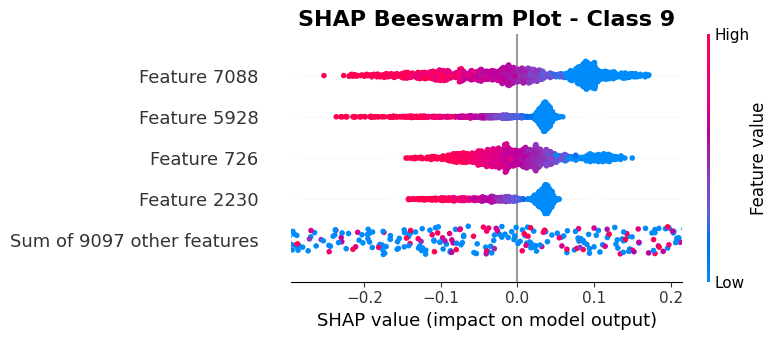

Class 9 的前10个重要特征:
  1. Feature 7088: 0.075790
  2. Feature 5928: 0.047107
  3. Feature 726: 0.045262
  4. Feature 2230: 0.042103
  5. Feature 4437: 0.041167
  6. Feature 2423: 0.041064
  7. Feature 1768: 0.040568
  8. Feature 2322: 0.040321
  9. Feature 1059: 0.039169
  10. Feature 2570: 0.038078

正在处理类别 10...
SHAP值范围: [-0.3346, 0.5272]
设置的横轴范围: [-0.4208, 0.6134]


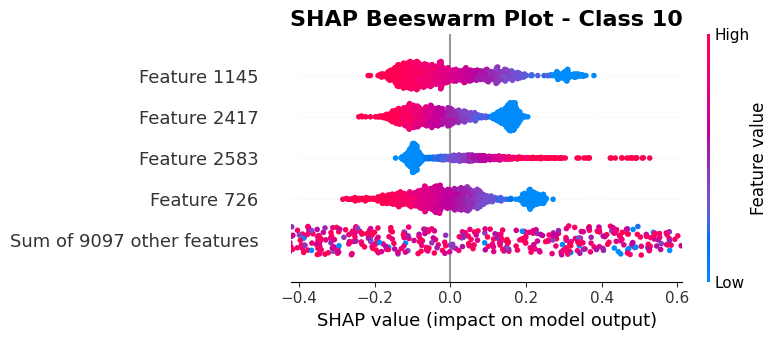

Class 10 的前10个重要特征:
  1. Feature 1145: 0.102222
  2. Feature 2417: 0.096985
  3. Feature 2583: 0.094597
  4. Feature 726: 0.092389
  5. Feature 393: 0.090468
  6. Feature 3179: 0.085925
  7. Feature 4705: 0.084421
  8. Feature 6896: 0.077216
  9. Feature 7462: 0.074710
  10. Feature 5872: 0.073980

正在处理类别 11...
SHAP值范围: [-0.2509, 0.3700]
设置的横轴范围: [-0.3130, 0.4321]


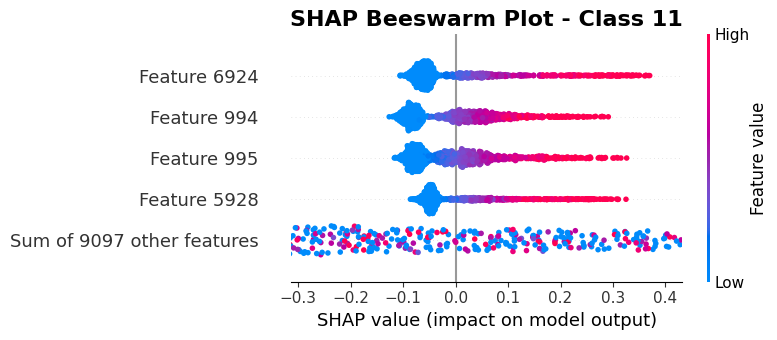

Class 11 的前10个重要特征:
  1. Feature 6924: 0.079505
  2. Feature 994: 0.070557
  3. Feature 995: 0.066840
  4. Feature 5928: 0.064624
  5. Feature 8397: 0.061635
  6. Feature 3977: 0.058957
  7. Feature 1858: 0.058642
  8. Feature 2417: 0.056766
  9. Feature 4364: 0.055969
  10. Feature 2172: 0.052674

正在处理类别 12...
SHAP值范围: [-0.3150, 0.2279]
设置的横轴范围: [-0.3692, 0.2822]


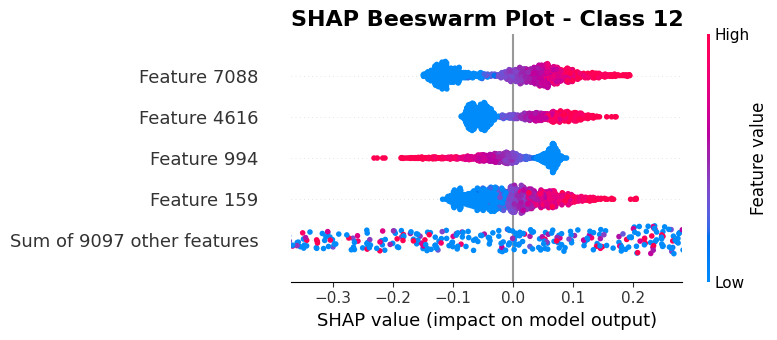

Class 12 的前10个重要特征:
  1. Feature 7088: 0.076496
  2. Feature 4616: 0.060909
  3. Feature 994: 0.052692
  4. Feature 159: 0.049064
  5. Feature 692: 0.047803
  6. Feature 3926: 0.047270
  7. Feature 7530: 0.046400
  8. Feature 3169: 0.044446
  9. Feature 4630: 0.043159
  10. Feature 4727: 0.043147

正在处理类别 13...
SHAP值范围: [-0.2113, 0.3543]
设置的横轴范围: [-0.2678, 0.4109]


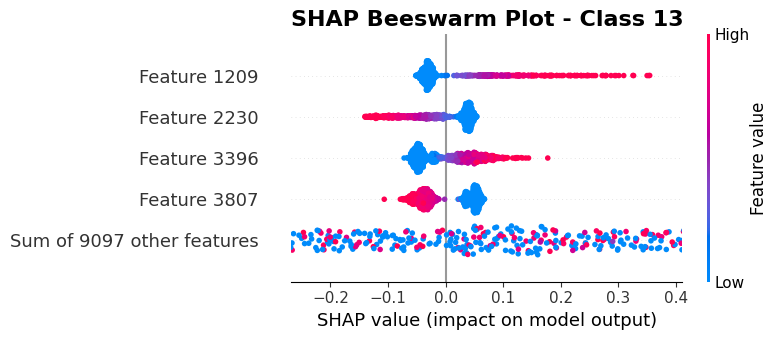

Class 13 的前10个重要特征:
  1. Feature 1209: 0.049783
  2. Feature 2230: 0.045439
  3. Feature 3396: 0.044626
  4. Feature 3807: 0.043990
  5. Feature 7452: 0.042946
  6. Feature 7381: 0.039005
  7. Feature 6679: 0.038533
  8. Feature 5108: 0.037295
  9. Feature 3223: 0.037115
  10. Feature 7419: 0.036633

正在处理类别 14...
SHAP值范围: [-0.1918, 0.2850]
设置的横轴范围: [-0.2395, 0.3326]


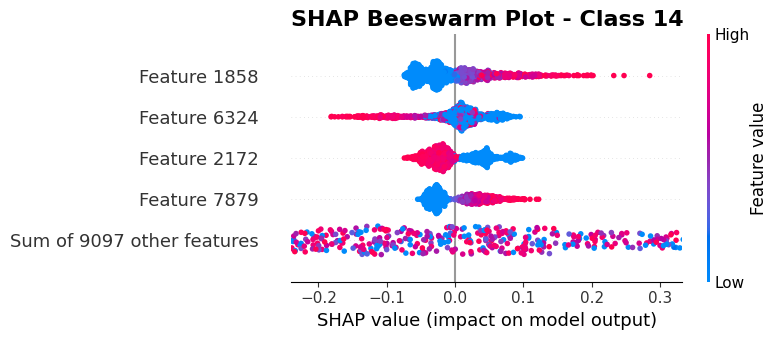

Class 14 的前10个重要特征:
  1. Feature 1858: 0.043458
  2. Feature 6324: 0.034886
  3. Feature 2172: 0.033562
  4. Feature 7879: 0.033527
  5. Feature 2417: 0.033336
  6. Feature 7337: 0.030700
  7. Feature 3452: 0.029697
  8. Feature 5824: 0.027421
  9. Feature 3977: 0.026893
  10. Feature 3532: 0.026792


In [17]:
import pickle
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据
with open('cancer_type_shap_values_rep9_all_obj.pkl', 'rb') as f:
    data = pickle.load(f)

# 数据预处理
if hasattr(data.data, 'cpu'):
    feature_data = data.data.cpu().numpy()
else:
    feature_data = data.data

shap_values = data.values
n_samples, n_features, n_classes = shap_values.shape
print(f"样本数: {n_samples}, 特征数: {n_features}, 类别数: {n_classes}")

# 为每个类别创建单独的Beeswarm Plot
for class_idx in range(n_classes):
    print(f"\n正在处理类别 {class_idx}...")
    
    # 提取当前类别的SHAP值
    class_shap_values = shap_values[:, :, class_idx]
    
    # 计算当前类别的SHAP值范围，用于设置合理的横轴限制
    shap_min = np.min(class_shap_values)
    shap_max = np.max(class_shap_values)
    
    # 添加一些边距
    x_margin = (shap_max - shap_min) * 0.1
    xlim_low = shap_min - x_margin
    xlim_high = shap_max + x_margin
    
    print(f"SHAP值范围: [{shap_min:.4f}, {shap_max:.4f}]")
    print(f"设置的横轴范围: [{xlim_low:.4f}, {xlim_high:.4f}]")
    
    # 创建当前类别的Explanation对象
    class_explanation = shap.Explanation(
        values=class_shap_values,
        base_values=np.zeros(n_samples),
        data=feature_data,
    )
    
    # 创建Beeswarm Plot
    plt.figure(figsize=(10, 8))
    shap.plots.beeswarm(
        class_explanation,
        max_display=5,
        show=False
    )
    
    # 设置自定义横轴范围
    plt.xlim(xlim_low, xlim_high)
    
    plt.title(f'SHAP Beeswarm Plot - Class {class_idx}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 打印当前类别的重要特征统计
    mean_abs_shap = np.abs(class_shap_values).mean(axis=0)
    top_features_idx = np.argsort(mean_abs_shap)[-10:][::-1]
    
    print(f"Class {class_idx} 的前10个重要特征:")
    for i, idx in enumerate(top_features_idx):
        print(f"  {i+1}. Feature {idx}: {mean_abs_shap[idx]:.6f}")

样本数: 1207, 特征数: 9101, 类别数: 15

正在处理类别 0: Adenocarcinoma...
SHAP值范围: [-0.6199, 0.8192]
设置的横轴范围: [-0.7638, 0.9632]


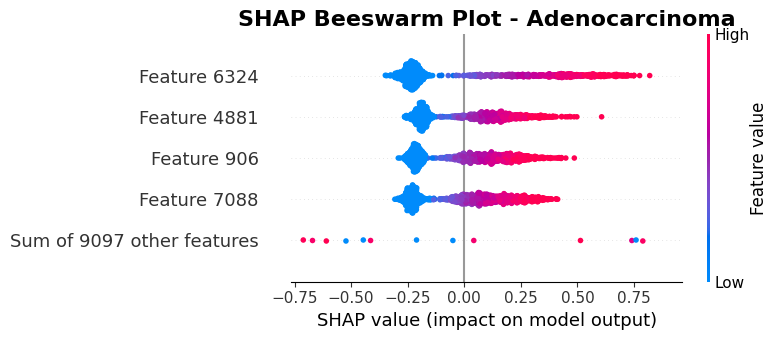

Adenocarcinoma 的前10个重要特征:
  1. Feature 6324: 0.287934
  2. Feature 4881: 0.169481
  3. Feature 906: 0.166812
  4. Feature 7088: 0.166772
  5. Feature 2322: 0.161616
  6. Feature 1298: 0.152180
  7. Feature 7782: 0.146205
  8. Feature 1012: 0.138178
  9. Feature 7519: 0.136055
  10. Feature 2538: 0.134361

正在处理类别 1: Basal cell carcinoma...
SHAP值范围: [-0.1808, 0.1860]
设置的横轴范围: [-0.2175, 0.2227]


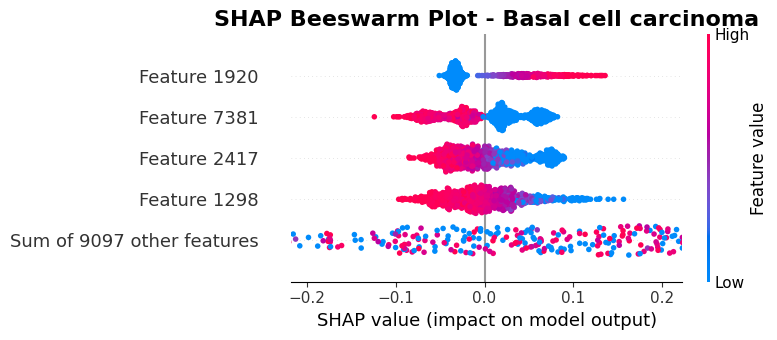

Basal cell carcinoma 的前10个重要特征:
  1. Feature 1920: 0.041633
  2. Feature 7381: 0.038237
  3. Feature 2417: 0.033550
  4. Feature 1298: 0.032808
  5. Feature 2423: 0.030237
  6. Feature 994: 0.030113
  7. Feature 4371: 0.028558
  8. Feature 7088: 0.028474
  9. Feature 2702: 0.028317
  10. Feature 272: 0.027671

正在处理类别 2: Carcinoma...
SHAP值范围: [-0.2264, 0.1783]
设置的横轴范围: [-0.2668, 0.2187]


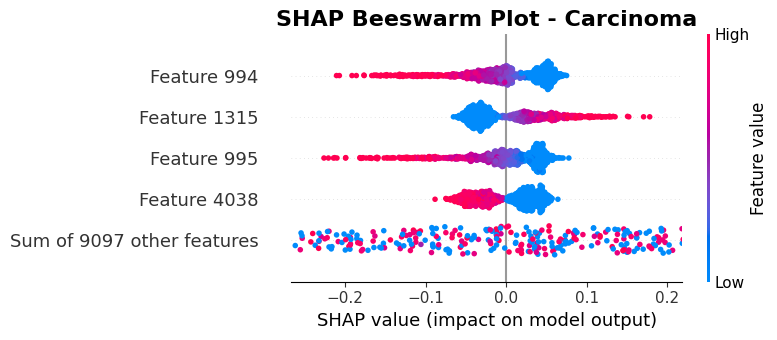

Carcinoma 的前10个重要特征:
  1. Feature 994: 0.039624
  2. Feature 1315: 0.038847
  3. Feature 995: 0.036086
  4. Feature 4038: 0.032684
  5. Feature 7419: 0.032639
  6. Feature 2668: 0.032524
  7. Feature 692: 0.032521
  8. Feature 6324: 0.030481
  9. Feature 5737: 0.028750
  10. Feature 435: 0.028375

正在处理类别 3: Glioblastoma...
SHAP值范围: [-0.2165, 0.3154]
设置的横轴范围: [-0.2697, 0.3686]


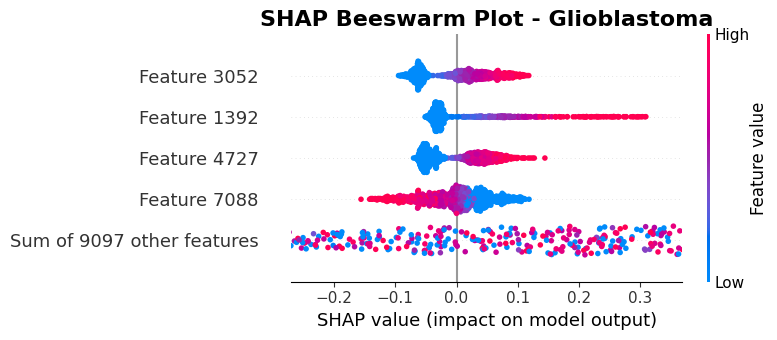

Glioblastoma 的前10个重要特征:
  1. Feature 3052: 0.048828
  2. Feature 1392: 0.048670
  3. Feature 4727: 0.046064
  4. Feature 7088: 0.041223
  5. Feature 272: 0.039362
  6. Feature 5928: 0.038745
  7. Feature 6679: 0.036920
  8. Feature 474: 0.035025
  9. Feature 5317: 0.033973
  10. Feature 726: 0.033833

正在处理类别 4: Lymphoma...
SHAP值范围: [-0.2689, 0.1771]
设置的横轴范围: [-0.3135, 0.2217]


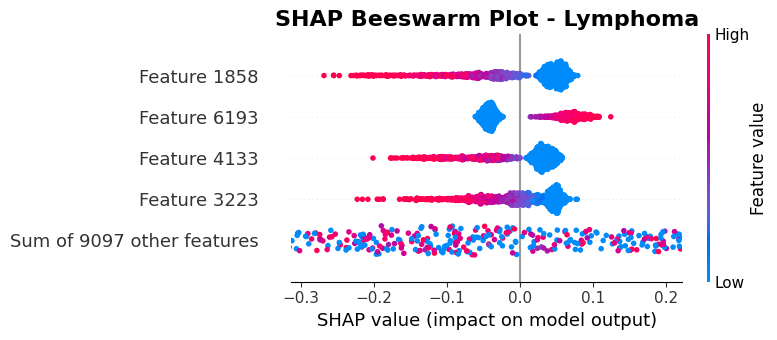

Lymphoma 的前10个重要特征:
  1. Feature 1858: 0.057708
  2. Feature 6193: 0.053134
  3. Feature 4133: 0.044563
  4. Feature 3223: 0.041054
  5. Feature 2762: 0.040732
  6. Feature 7381: 0.040182
  7. Feature 7337: 0.039060
  8. Feature 7088: 0.037951
  9. Feature 1126: 0.037873
  10. Feature 1768: 0.036669

正在处理类别 5: Melanoma...
SHAP值范围: [-0.2045, 0.2205]
设置的横轴范围: [-0.2470, 0.2630]


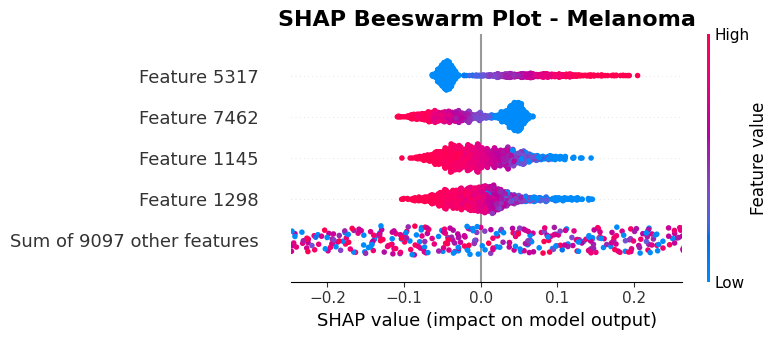

Melanoma 的前10个重要特征:
  1. Feature 5317: 0.055613
  2. Feature 7462: 0.044351
  3. Feature 1145: 0.034727
  4. Feature 1298: 0.032545
  5. Feature 7782: 0.032455
  6. Feature 1494: 0.031409
  7. Feature 1858: 0.031029
  8. Feature 6324: 0.030505
  9. Feature 1315: 0.029000
  10. Feature 393: 0.028898

正在处理类别 6: Neuroblastoma...
SHAP值范围: [-0.2044, 0.2003]
设置的横轴范围: [-0.2449, 0.2407]


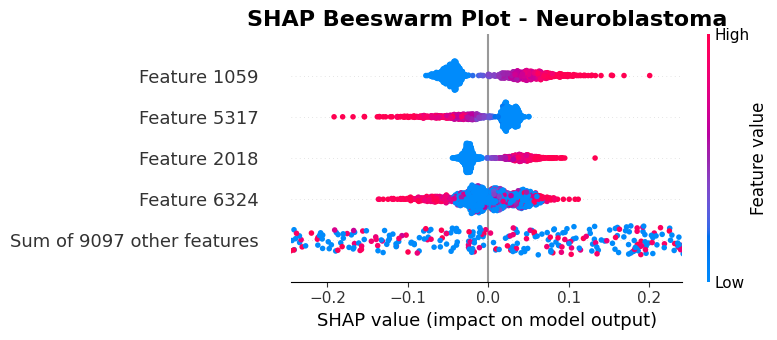

Neuroblastoma 的前10个重要特征:
  1. Feature 1059: 0.049428
  2. Feature 5317: 0.033129
  3. Feature 2018: 0.031911
  4. Feature 6324: 0.031834
  5. Feature 7337: 0.029780
  6. Feature 272: 0.028588
  7. Feature 994: 0.027709
  8. Feature 1298: 0.027325
  9. Feature 250: 0.026927
  10. Feature 7088: 0.026846

正在处理类别 7: Neuroendocrine...
SHAP值范围: [-0.2729, 0.2457]
设置的横轴范围: [-0.3248, 0.2976]


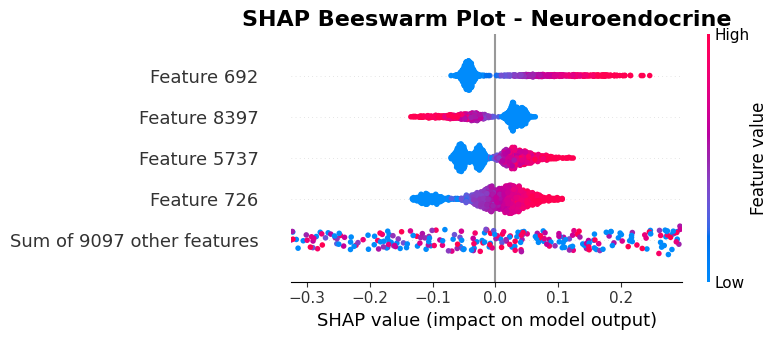

Neuroendocrine 的前10个重要特征:
  1. Feature 692: 0.059985
  2. Feature 8397: 0.041026
  3. Feature 5737: 0.040112
  4. Feature 726: 0.039726
  5. Feature 7462: 0.038817
  6. Feature 4616: 0.038261
  7. Feature 7381: 0.037590
  8. Feature 6324: 0.036241
  9. Feature 3179: 0.036185
  10. Feature 5872: 0.036062

正在处理类别 8: Normal...
SHAP值范围: [-0.7199, 0.6726]
设置的横轴范围: [-0.8592, 0.8119]


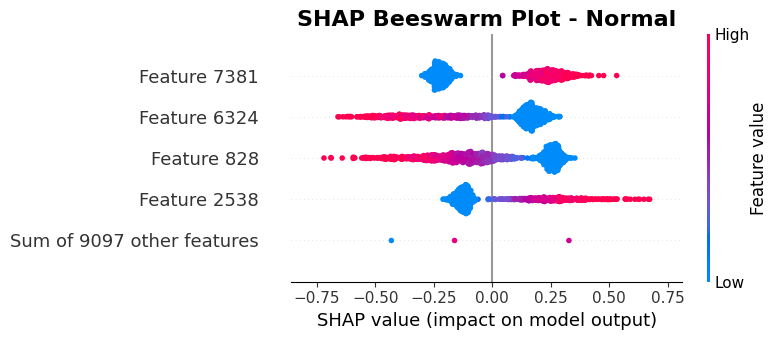

Normal 的前10个重要特征:
  1. Feature 7381: 0.233027
  2. Feature 6324: 0.210053
  3. Feature 828: 0.206095
  4. Feature 2538: 0.171837
  5. Feature 975: 0.161966
  6. Feature 3535: 0.137246
  7. Feature 1570: 0.132496
  8. Feature 5812: 0.131916
  9. Feature 1673: 0.131912
  10. Feature 4352: 0.127095

正在处理类别 9: Renal cell carcinoma...
SHAP值范围: [-0.2528, 0.1727]
设置的横轴范围: [-0.2954, 0.2153]


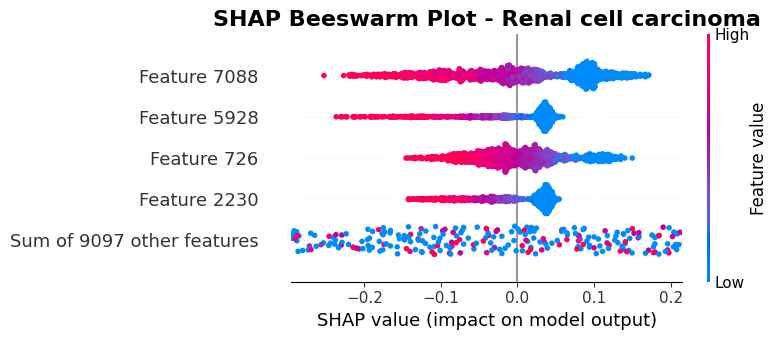

Renal cell carcinoma 的前10个重要特征:
  1. Feature 7088: 0.075790
  2. Feature 5928: 0.047107
  3. Feature 726: 0.045262
  4. Feature 2230: 0.042103
  5. Feature 4437: 0.041167
  6. Feature 2423: 0.041064
  7. Feature 1768: 0.040568
  8. Feature 2322: 0.040321
  9. Feature 1059: 0.039169
  10. Feature 2570: 0.038078

正在处理类别 10: Sarcoma...
SHAP值范围: [-0.3346, 0.5272]
设置的横轴范围: [-0.4208, 0.6134]


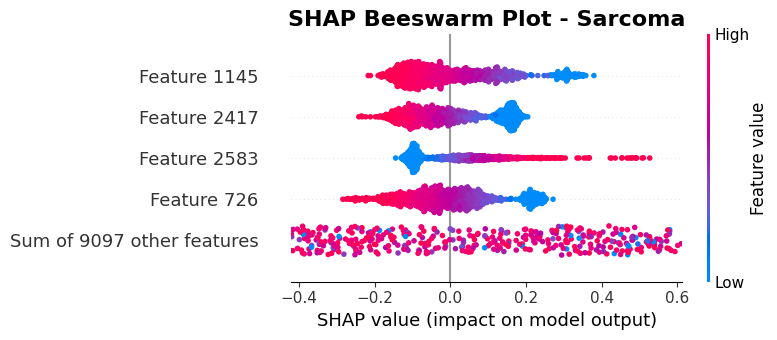

Sarcoma 的前10个重要特征:
  1. Feature 1145: 0.102222
  2. Feature 2417: 0.096985
  3. Feature 2583: 0.094597
  4. Feature 726: 0.092389
  5. Feature 393: 0.090468
  6. Feature 3179: 0.085925
  7. Feature 4705: 0.084421
  8. Feature 6896: 0.077216
  9. Feature 7462: 0.074710
  10. Feature 5872: 0.073980

正在处理类别 11: Squamous...
SHAP值范围: [-0.2509, 0.3700]
设置的横轴范围: [-0.3130, 0.4321]


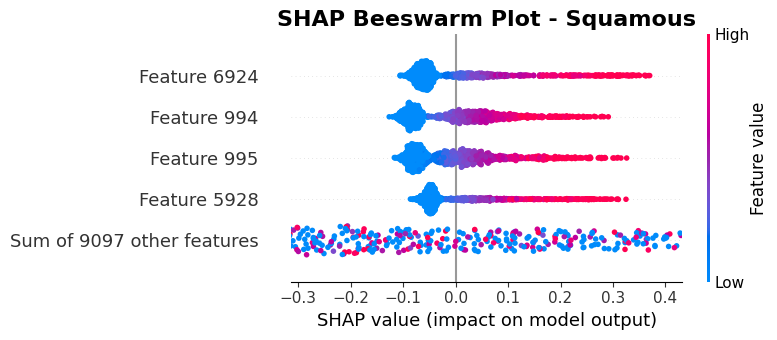

Squamous 的前10个重要特征:
  1. Feature 6924: 0.079505
  2. Feature 994: 0.070557
  3. Feature 995: 0.066840
  4. Feature 5928: 0.064624
  5. Feature 8397: 0.061635
  6. Feature 3977: 0.058957
  7. Feature 1858: 0.058642
  8. Feature 2417: 0.056766
  9. Feature 4364: 0.055969
  10. Feature 2172: 0.052674

正在处理类别 12: Thyroid papillary...
SHAP值范围: [-0.3150, 0.2279]
设置的横轴范围: [-0.3692, 0.2822]


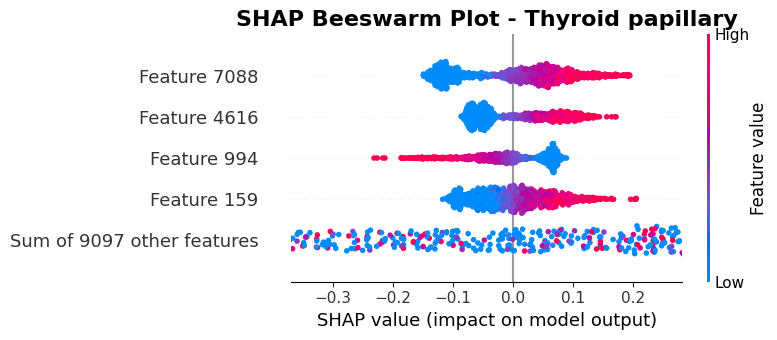

Thyroid papillary 的前10个重要特征:
  1. Feature 7088: 0.076496
  2. Feature 4616: 0.060909
  3. Feature 994: 0.052692
  4. Feature 159: 0.049064
  5. Feature 692: 0.047803
  6. Feature 3926: 0.047270
  7. Feature 7530: 0.046400
  8. Feature 3169: 0.044446
  9. Feature 4630: 0.043159
  10. Feature 4727: 0.043147

正在处理类别 13: Transitional cell carcinoma...
SHAP值范围: [-0.2113, 0.3543]
设置的横轴范围: [-0.2678, 0.4109]


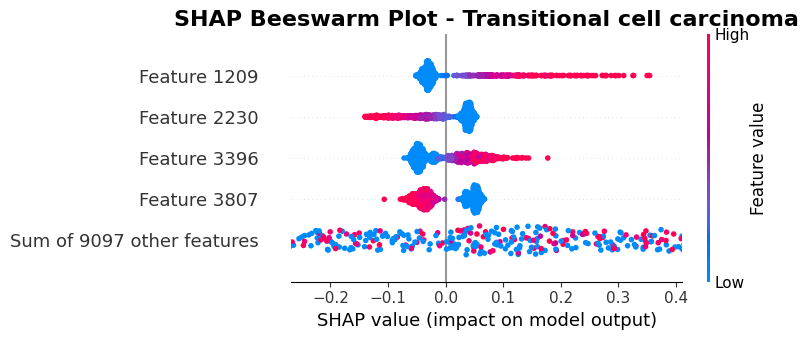

Transitional cell carcinoma 的前10个重要特征:
  1. Feature 1209: 0.049783
  2. Feature 2230: 0.045439
  3. Feature 3396: 0.044626
  4. Feature 3807: 0.043990
  5. Feature 7452: 0.042946
  6. Feature 7381: 0.039005
  7. Feature 6679: 0.038533
  8. Feature 5108: 0.037295
  9. Feature 3223: 0.037115
  10. Feature 7419: 0.036633

正在处理类别 14: Wilm's tumour...
SHAP值范围: [-0.1918, 0.2850]
设置的横轴范围: [-0.2395, 0.3326]


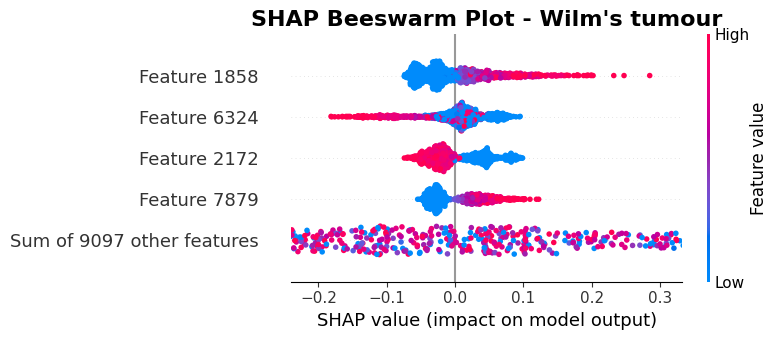

Wilm's tumour 的前10个重要特征:
  1. Feature 1858: 0.043458
  2. Feature 6324: 0.034886
  3. Feature 2172: 0.033562
  4. Feature 7879: 0.033527
  5. Feature 2417: 0.033336
  6. Feature 7337: 0.030700
  7. Feature 3452: 0.029697
  8. Feature 5824: 0.027421
  9. Feature 3977: 0.026893
  10. Feature 3532: 0.026792


In [19]:
import pickle
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定义类别名称
class_names = [
    "Adenocarcinoma",
    "Basal cell carcinoma", 
    "Carcinoma",
    "Glioblastoma",
    "Lymphoma",
    "Melanoma",
    "Neuroblastoma",
    "Neuroendocrine",
    "Normal",
    "Renal cell carcinoma",
    "Sarcoma",
    "Squamous",
    "Thyroid papillary",
    "Transitional cell carcinoma",
    "Wilm's tumour"
]

# 读取数据
with open('cancer_type_shap_values_rep9_all_obj.pkl', 'rb') as f:
    data = pickle.load(f)

# 数据预处理
if hasattr(data.data, 'cpu'):
    feature_data = data.data.cpu().numpy()
else:
    feature_data = data.data

shap_values = data.values
n_samples, n_features, n_classes = shap_values.shape
print(f"样本数: {n_samples}, 特征数: {n_features}, 类别数: {n_classes}")

# 检查类别数量是否匹配
if n_classes != len(class_names):
    print(f"警告: SHAP值中的类别数({n_classes})与类别名称数({len(class_names)})不匹配!")
    # 使用较小的数量
    n_classes = min(n_classes, len(class_names))

# 为每个类别创建单独的Beeswarm Plot
for class_idx in range(n_classes):
    class_name = class_names[class_idx]
    print(f"\n正在处理类别 {class_idx}: {class_name}...")
    
    # 提取当前类别的SHAP值
    class_shap_values = shap_values[:, :, class_idx]
    
    # 计算当前类别的SHAP值范围，用于设置合理的横轴限制
    shap_min = np.min(class_shap_values)
    shap_max = np.max(class_shap_values)
    
    # 添加一些边距
    x_margin = (shap_max - shap_min) * 0.1
    xlim_low = shap_min - x_margin
    xlim_high = shap_max + x_margin
    
    print(f"SHAP值范围: [{shap_min:.4f}, {shap_max:.4f}]")
    print(f"设置的横轴范围: [{xlim_low:.4f}, {xlim_high:.4f}]")
    
    # 创建当前类别的Explanation对象
    class_explanation = shap.Explanation(
        values=class_shap_values,
        base_values=np.zeros(n_samples),
        data=feature_data,
    )
    
    # 创建Beeswarm Plot
    plt.figure(figsize=(10, 10))
    shap.plots.beeswarm(
        class_explanation,
        max_display=5,
        show=False
    )
    
    # 设置自定义横轴范围
    plt.xlim(xlim_low, xlim_high)
    
    # 使用类别名称作为标题
    plt.title(f'SHAP Beeswarm Plot - {class_name}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 打印当前类别的重要特征统计
    mean_abs_shap = np.abs(class_shap_values).mean(axis=0)
    top_features_idx = np.argsort(mean_abs_shap)[-10:][::-1]
    
    print(f"{class_name} 的前10个重要特征:")
    for i, idx in enumerate(top_features_idx):
        print(f"  {i+1}. Feature {idx}: {mean_abs_shap[idx]:.6f}")